# Immigration Region/Country Data -- Outline
## 1. Introduction - how to use Jupyter

## 2. The dataset
### a) Context/background of the dataset
"The [2017 Yearbook of Immigration Statistics](https://www.dhs.gov/immigration-statistics/yearbook) is a compendium of tables that provide data on foreign nationals who are granted lawful permanent residence (i.e., immigrants who receive a “green card”), admitted as temporary nonimmigrants, granted asylum or refugee status, or are naturalized. The Yearbook also presents data on immigration enforcement actions, including apprehensions and arrests, removals, and returns" (Homeland Security)

"Tables of interest are: 21, 23, 25, 26, 40, 41" (Dev Meeting 6/19)

Looking at data from Mexico and the [gang truce](https://www.cfr.org/backgrounder/central-americas-violent-northern-triangle): El Salvador, Honduras, Guatemala (?? Someone please confirm which countries are considered in the gang truce)

### b) what does a column represent
### c) what does a row represent

## 3. Immigration by Region and Country
### a) begin cleaning data 
#### 1. fix year column


## 4. Visualization
### a) graphs of the number of immigrants over time
- Mexico 
- El Salvador
- Honduras
- Guatemala 
- Maybe something from the US for comparrison?

# Attempt at Reformatting the Data 

Attempted to put the fiscal_year column in a year format. Issue with index column when you try to use datascience library on the reformatted dataframe

I tried to replace the dataframe column with the reformatted year column and it keeps converting back to the original format it was in (i.e. no changes seem to occur). I also tried using replace and also just overriding the column. 

Then I tried just creating a new dataframe with the original columns and the reformatted years column. 

Overall there probably is a better way to do all of this...but none of these attempts worked. Currently all of what I attempted is commented out

In [1]:
#import pandas as pd

In [2]:
#region_country = Table.read_table('ImmigrantsRegionCountry.csv') # read in the dataset

In [3]:
#region_country

In [4]:
# #Attempting to reformat the year
# year_format = pd.to_datetime(region_country['fiscal_year'].astype(str), format='%Y').year

# formatted_yr = pd.DataFrame(data = year_format, columns = ['year'])
# formatted_yr.head(6)

In [5]:
# #Trying to find a way to get the years formatted in a dataframe with the other columns in the original table
# #I tried to replace the dataframe column with the reformatted year column and it keeps converting back to the 
# #original format it was in (i.e. no changes seem to occur). Tried using replace and also just overriding the 
# #column 
# #Also, overall there probably is a better way to do all of this

# d = {'year': formatted_yr['year'], 'country': region_country['country'], 'total': region_country['total']}
# df = pd.DataFrame(data=d)
# df.head(10)
# #region_country = df.style.hide_index() #This takes forever to load 

# region_country = df
# region_country.head(10)

# EDA with the Data (not using Pandas and year not reformatted)

In [6]:
from datascience import *

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [7]:
region_country = Table.read_table('ImmigrantsRegionCountry.csv') # read in the dataset

In [8]:
region_country

#Need to reformat fiscal_year. Is there something similar to e.g. set_format("Population", NumberFormatter) that can
#allow for this?

fiscal_year,country,total
"1,989",Afghanistan,"3,232"
"1,989",Albania,71
"1,989",Algeria,230
"1,989",American Samoa,1
"1,989",Andorra,4
"1,989",Angola,143
"1,989",Anguilla,43
"1,989",Antigua-Barbuda,979
"1,989",Argentina,"3,301"
"1,989",Aruba,73


In [9]:
num_rows = region_country.num_rows
print('There are', num_rows, 'in the dataset')

There are 5925 in the dataset


In [10]:
total_countries = region_country.group('country').num_rows
total_countries
print('There are' , total_countries, 'countries represented in the dataset')


There are 240 countries represented in the dataset


In [11]:
min_yr = min(region_country.column('fiscal_year'))
max_yr = max(region_country.column('fiscal_year'))
print('The fiscal years range from', min_yr, 'to', max_yr)

The fiscal years range from 1989 to 2017


In [12]:
#Countries with the minimum immigration total in whole dataset 
all_min = min(region_country.column('total'))
region_country.where('total', are.equal_to(all_min))

fiscal_year,country,total
"1,989",American Samoa,1
"1,989",Bhutan,1
"1,989",Central African Republic,1
"1,989",Greenland,1
"1,989",Reunion,1
"1,989",St. Helena,1
"1,989",U.S. Virgin Islands,1
"1,990",Bhutan,1
"1,990",Falkland Islands,1
"1,990",Gibraltar,1


In [13]:
#Countries with the maximum immigration total in whole dataset 
all_max = max(region_country.column('total'))
region_country.where('total', are.equal_to(all_max))

fiscal_year,country,total
"1,991",Mexico,"946,167"


In [14]:
avg_total = round(np.average(region_country.column('total')))

print('The average total in the dataset is', avg_total)

The average total in the dataset is 5009.0


## EDA Mexico

In [15]:
mexico = region_country.where('country', are.containing('Mexico'))
mexico 

fiscal_year,country,total
"1,989",Mexico,"405,172"
"1,990",Mexico,"679,068"
"1,991",Mexico,"946,167"
"1,992",Mexico,"213,802"
"1,993",Mexico,"126,561"
"1,994",Mexico,"111,398"
"1,995",Mexico,"89,932"
"1,996",Mexico,"163,572"
"1,997",Mexico,"146,865"
"1,998",Mexico,"131,575"


In [16]:
oldest_yr = min(mexico.column('fiscal_year'))
recent_yr = max(mexico.column('fiscal_year'))
print('The immigration data on Mexico comes from years', oldest_yr, 'to', recent_yr)

The immigration data on Mexico comes from years 1989 to 2017


In [17]:
#Row with the minimum total immigration in Mexico
min_total = min(mexico.column('total'))
mexico.where('total', are.equal_to(min_total))

#In the year 1995 the Mexico Peso Crisis occured 

fiscal_year,country,total
"1,995",Mexico,"89,932"


In [18]:
#Row with the maximum total immigration in Mexico
max_total = max(mexico.column('total'))
mexico.where('total', are.equal_to(max_total))

fiscal_year,country,total
"1,991",Mexico,"946,167"


In [19]:
mex_avg_total = round(np.average(mexico.column('total')))

print('The average total for Mexico is', mex_avg_total)

The average total for Mexico is 210037.0


In [20]:
mexico.sort('total', descending = True)

fiscal_year,country,total
"1,991",Mexico,"946,167"
"1,990",Mexico,"679,068"
"1,989",Mexico,"405,172"
"2,002",Mexico,"218,822"
"1,992",Mexico,"213,802"
"2,001",Mexico,"205,560"
"2,008",Mexico,"189,989"
"2,004",Mexico,"175,411"
"2,016",Mexico,"174,534"
"2,006",Mexico,"173,749"


In [21]:
#table with fiscal years 1989 - 2007
pre_crisis = mexico.where('fiscal_year', are.between_or_equal_to(1989,2007))
pre_crisis

fiscal_year,country,total
"1,989",Mexico,"405,172"
"1,990",Mexico,"679,068"
"1,991",Mexico,"946,167"
"1,992",Mexico,"213,802"
"1,993",Mexico,"126,561"
"1,994",Mexico,"111,398"
"1,995",Mexico,"89,932"
"1,996",Mexico,"163,572"
"1,997",Mexico,"146,865"
"1,998",Mexico,"131,575"


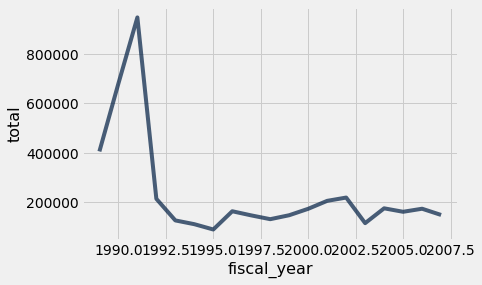

In [22]:
pre_crisis.plot('fiscal_year', 'total')

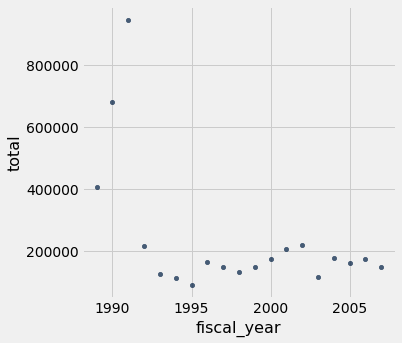

In [23]:
pre_crisis.scatter('fiscal_year', 'total')

In [24]:
#Table with fiscal years 2008-2017
post_crisis = mexico.where('fiscal_year', are.between_or_equal_to(2008,2017))
post_crisis

fiscal_year,country,total
"2,008",Mexico,"189,989"
"2,009",Mexico,"164,920"
"2,010",Mexico,"139,120"
"2,011",Mexico,"143,446"
"2,012",Mexico,"146,406"
"2,013",Mexico,"135,028"
"2,014",Mexico,"134,052"
"2,015",Mexico,"158,619"
"2,016",Mexico,"174,534"
"2,017",Mexico,"170,581"


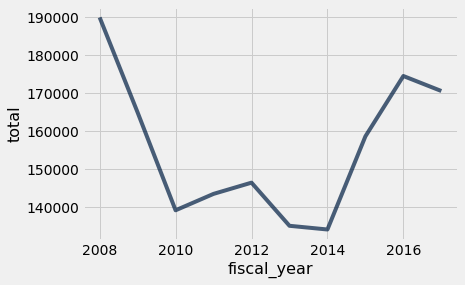

In [25]:
post_crisis.plot('fiscal_year', 'total')

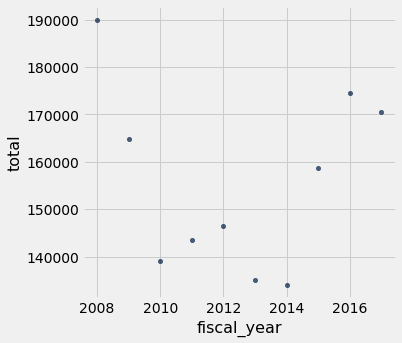

In [26]:
post_crisis.scatter('fiscal_year', 'total')

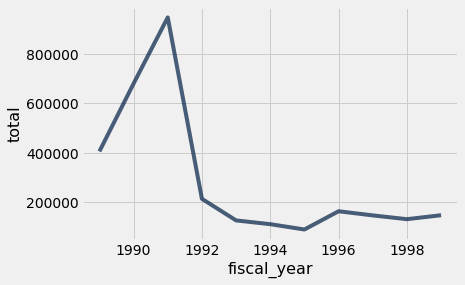

In [27]:
#plot of total immigration from 1989-1999
pre_mill = mexico.where('fiscal_year', are.between_or_equal_to(1989,1999))
pre_mill.plot('fiscal_year', 'total')

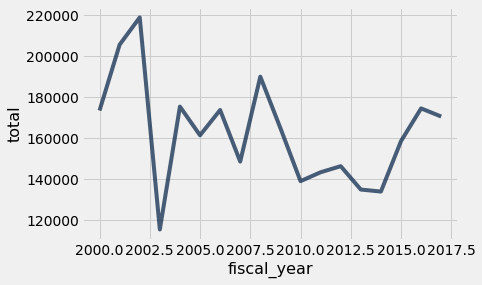

In [28]:
post_mill = mexico.where('fiscal_year', are.between_or_equal_to(2000,2017))
post_mill.plot('fiscal_year', 'total')


In [29]:
mexico.relabel('total', 'mexico total')

fiscal_year,country,mexico total
"1,989",Mexico,"405,172"
"1,990",Mexico,"679,068"
"1,991",Mexico,"946,167"
"1,992",Mexico,"213,802"
"1,993",Mexico,"126,561"
"1,994",Mexico,"111,398"
"1,995",Mexico,"89,932"
"1,996",Mexico,"163,572"
"1,997",Mexico,"146,865"
"1,998",Mexico,"131,575"


In [30]:
mexico

fiscal_year,country,mexico total
"1,989",Mexico,"405,172"
"1,990",Mexico,"679,068"
"1,991",Mexico,"946,167"
"1,992",Mexico,"213,802"
"1,993",Mexico,"126,561"
"1,994",Mexico,"111,398"
"1,995",Mexico,"89,932"
"1,996",Mexico,"163,572"
"1,997",Mexico,"146,865"
"1,998",Mexico,"131,575"


## EDA El Salvador

In [31]:
el_salvador = region_country.where('country', are.equal_to('El Salvador'))
el_salvador

fiscal_year,country,total
"1,989",El Salvador,"57,878"
"1,990",El Salvador,"80,173"
"1,991",El Salvador,"47,351"
"1,992",El Salvador,"26,191"
"1,993",El Salvador,"26,818"
"1,994",El Salvador,"17,644"
"1,995",El Salvador,"11,744"
"1,996",El Salvador,"17,903"
"1,997",El Salvador,"17,969"
"1,998",El Salvador,"14,590"


In [32]:
#Row with the minimum total immigration in El Salvador
es_min_total = min(el_salvador.column('total'))
el_salvador.where('total', are.equal_to(es_min_total))

#Maybe note that Salvadorian Civil War took place between 1979-1992

fiscal_year,country,total
"1,995",El Salvador,"11,744"


In [33]:
#Row with the maximum total immigration in El Salvador
es_max_total = max(el_salvador.column('total'))
el_salvador.where('total', are.equal_to(es_max_total))

fiscal_year,country,total
"1,990",El Salvador,"80,173"


In [34]:
es_avg_total = round(np.average(el_salvador.column('total')))

print('The average total for El Salvador is', es_avg_total)

The average total for El Salvador is 25819.0


In [35]:
es_pre_crisis = el_salvador.where('fiscal_year', are.between_or_equal_to(1989,2007))
es_pre_crisis

fiscal_year,country,total
"1,989",El Salvador,"57,878"
"1,990",El Salvador,"80,173"
"1,991",El Salvador,"47,351"
"1,992",El Salvador,"26,191"
"1,993",El Salvador,"26,818"
"1,994",El Salvador,"17,644"
"1,995",El Salvador,"11,744"
"1,996",El Salvador,"17,903"
"1,997",El Salvador,"17,969"
"1,998",El Salvador,"14,590"


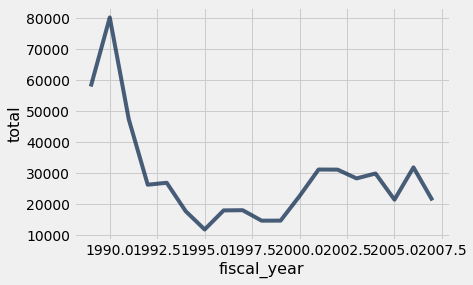

In [36]:
es_pre_crisis.plot('fiscal_year', 'total')

In [37]:
es_post_crisis = el_salvador.where('fiscal_year', are.between_or_equal_to(2008,2017))
es_post_crisis

fiscal_year,country,total
"2,008",El Salvador,"19,659"
"2,009",El Salvador,"19,909"
"2,010",El Salvador,"18,806"
"2,011",El Salvador,"18,667"
"2,012",El Salvador,"16,256"
"2,013",El Salvador,"18,260"
"2,014",El Salvador,"19,273"
"2,015",El Salvador,"19,487"
"2,016",El Salvador,"23,449"
"2,017",El Salvador,"25,109"


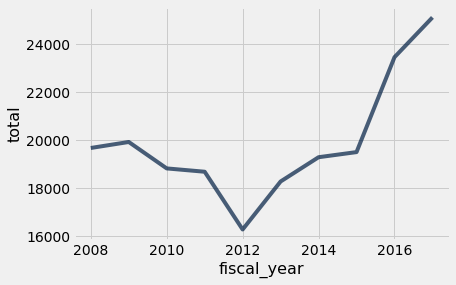

In [38]:
es_post_crisis.plot('fiscal_year', 'total')

In [39]:
el_salvador.relabel('total', 'El Salvador total')

fiscal_year,country,El Salvador total
"1,989",El Salvador,"57,878"
"1,990",El Salvador,"80,173"
"1,991",El Salvador,"47,351"
"1,992",El Salvador,"26,191"
"1,993",El Salvador,"26,818"
"1,994",El Salvador,"17,644"
"1,995",El Salvador,"11,744"
"1,996",El Salvador,"17,903"
"1,997",El Salvador,"17,969"
"1,998",El Salvador,"14,590"


### EDA Honduras

In [40]:
honduras = region_country.where('country', are.equal_to('Honduras'))
honduras

fiscal_year,country,total
"1,989",Honduras,"7,593"
"1,990",Honduras,"12,024"
"1,991",Honduras,"11,451"
"1,992",Honduras,"6,552"
"1,993",Honduras,"7,306"
"1,994",Honduras,"5,265"
"1,995",Honduras,"5,496"
"1,996",Honduras,"5,870"
"1,997",Honduras,"7,616"
"1,998",Honduras,"6,463"


In [41]:
#Row with the minimum total immigration in Honduras
hon_min_total = min(honduras.column('total'))
honduras.where('total', are.equal_to(hon_min_total))

fiscal_year,country,total
"2,003",Honduras,"4,645"


In [42]:
#Row with the maximum total immigration in Honduras
hon_max_total = max(honduras.column('total'))
honduras.where('total', are.equal_to(hon_max_total))

fiscal_year,country,total
"2,016",Honduras,"13,302"


In [43]:
hon_avg_total = round(np.average(honduras.column('total')))

print('The average total for Honduras is', hon_avg_total)

The average total for Honduras is 7441.0


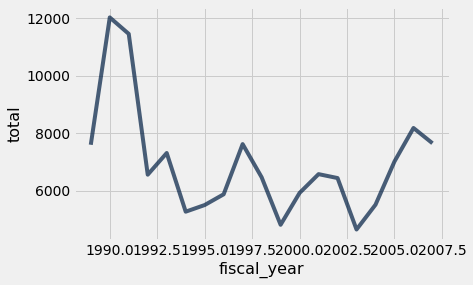

In [44]:
hon_pre_crisis = honduras.where('fiscal_year', are.between_or_equal_to(1989,2007))
hon_pre_crisis.plot('fiscal_year', 'total')

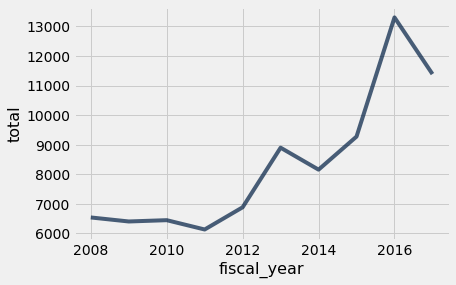

In [45]:
hon_post_crisis = honduras.where('fiscal_year', are.between_or_equal_to(2008,2017))
hon_post_crisis.plot('fiscal_year', 'total')

In [46]:
honduras.relabel('total', 'Honduras total')

fiscal_year,country,Honduras total
"1,989",Honduras,"7,593"
"1,990",Honduras,"12,024"
"1,991",Honduras,"11,451"
"1,992",Honduras,"6,552"
"1,993",Honduras,"7,306"
"1,994",Honduras,"5,265"
"1,995",Honduras,"5,496"
"1,996",Honduras,"5,870"
"1,997",Honduras,"7,616"
"1,998",Honduras,"6,463"


## EDA Guatemala

In [47]:
guatemala = region_country.where('country', are.equal_to('Guatemala'))
guatemala

fiscal_year,country,total
"1,989",Guatemala,"19,049"
"1,990",Guatemala,"32,303"
"1,991",Guatemala,"25,527"
"1,992",Guatemala,"10,521"
"1,993",Guatemala,"11,870"
"1,994",Guatemala,"7,389"
"1,995",Guatemala,"6,213"
"1,996",Guatemala,"8,763"
"1,997",Guatemala,"7,785"
"1,998",Guatemala,"7,759"


In [48]:
#Row with the minimum total immigration in Guatemala
guat_min_total = min(guatemala.column('total'))
guatemala.where('total', are.equal_to(guat_min_total))

fiscal_year,country,total
"1,995",Guatemala,"6,213"


In [49]:
#Row with the maximum total immigration in Guatemala
guat_max_total = max(guatemala.column('total'))
guatemala.where('total', are.equal_to(guat_max_total))

fiscal_year,country,total
"1,990",Guatemala,"32,303"


In [50]:
guat_avg_total = round(np.average(guatemala.column('total')))

print('The average total for Guatemala is', guat_avg_total)

The average total for Guatemala is 13620.0


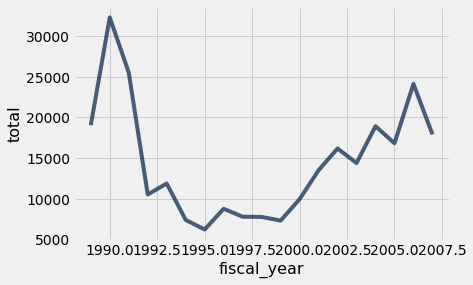

In [51]:
guat_pre_crisis = guatemala.where('fiscal_year', are.between_or_equal_to(1989,2007))
guat_pre_crisis.plot('fiscal_year', 'total')

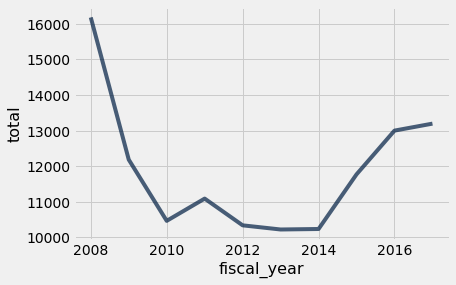

In [52]:
guat_post_crisis = guatemala.where('fiscal_year', are.between_or_equal_to(2008,2017))
guat_post_crisis.plot('fiscal_year', 'total')

In [53]:
guatemala.relabel('total', 'Guatemala total')

fiscal_year,country,Guatemala total
"1,989",Guatemala,"19,049"
"1,990",Guatemala,"32,303"
"1,991",Guatemala,"25,527"
"1,992",Guatemala,"10,521"
"1,993",Guatemala,"11,870"
"1,994",Guatemala,"7,389"
"1,995",Guatemala,"6,213"
"1,996",Guatemala,"8,763"
"1,997",Guatemala,"7,785"
"1,998",Guatemala,"7,759"


## Joining of the data from the different countries

In [54]:
latin_countries = mexico.join('fiscal_year', el_salvador).join('fiscal_year', honduras).join('fiscal_year', guatemala).drop(1,3,5,7)
latin_countries

#Dropped column that specified the country 

fiscal_year,mexico total,El Salvador total,Honduras total,Guatemala total
"1,989","405,172","57,878","7,593","19,049"
"1,990","679,068","80,173","12,024","32,303"
"1,991","946,167","47,351","11,451","25,527"
"1,992","213,802","26,191","6,552","10,521"
"1,993","126,561","26,818","7,306","11,870"
"1,994","111,398","17,644","5,265","7,389"
"1,995","89,932","11,744","5,496","6,213"
"1,996","163,572","17,903","5,870","8,763"
"1,997","146,865","17,969","7,616","7,785"
"1,998","131,575","14,590","6,463","7,759"


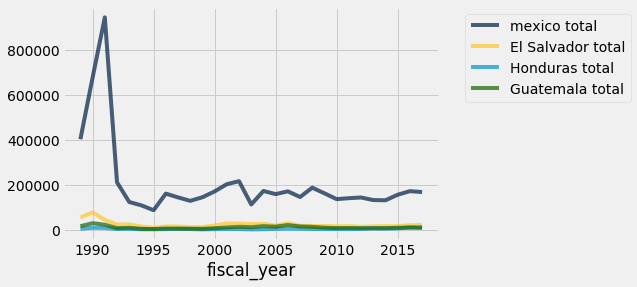

In [55]:
latin_countries.plot('fiscal_year')

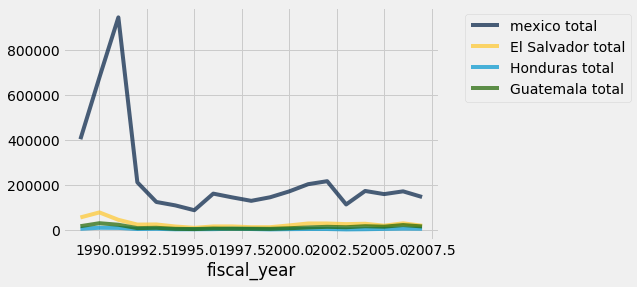

In [56]:
all_pre_crisis = latin_countries.where('fiscal_year', are.between_or_equal_to(1989,2007))
all_pre_crisis.plot('fiscal_year')

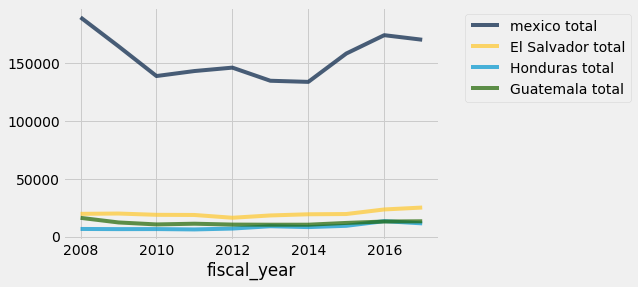

In [57]:
all_post_crisis = latin_countries.where('fiscal_year', are.between_or_equal_to(2008,2017))
all_post_crisis.plot('fiscal_year')

In [58]:
truce_gang = latin_countries.drop('mexico total')
truce_gang

fiscal_year,El Salvador total,Honduras total,Guatemala total
"1,989","57,878","7,593","19,049"
"1,990","80,173","12,024","32,303"
"1,991","47,351","11,451","25,527"
"1,992","26,191","6,552","10,521"
"1,993","26,818","7,306","11,870"
"1,994","17,644","5,265","7,389"
"1,995","11,744","5,496","6,213"
"1,996","17,903","5,870","8,763"
"1,997","17,969","7,616","7,785"
"1,998","14,590","6,463","7,759"


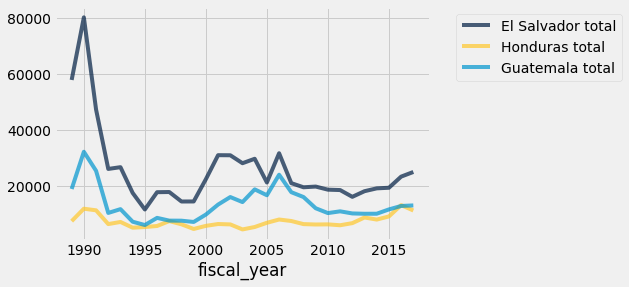

In [59]:
truce_gang.plot('fiscal_year')

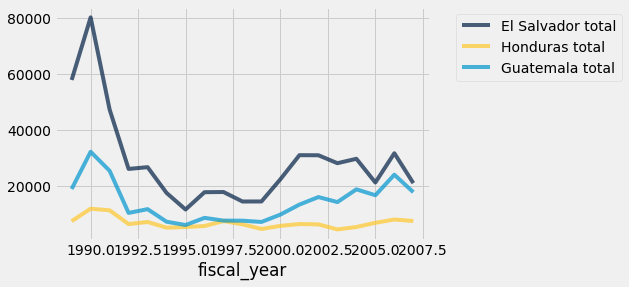

In [60]:
truce_pre_crisis = truce_gang.where('fiscal_year', are.between_or_equal_to(1989,2007))
truce_pre_crisis.plot('fiscal_year')

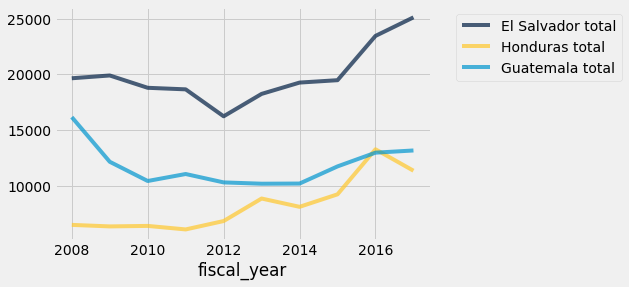

In [61]:
truce_post_crisis = truce_gang.where('fiscal_year', are.between_or_equal_to(2008,2017))
truce_post_crisis.plot('fiscal_year')